#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*Julio Quintana - A01793661   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [6]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
from pandas.core.arrays import categorical # agregar class pandas.Categorical(values, categories=None, ordered=None, dtype=None, fastpath=False, copy=True)
from sklearn.pipeline import Pipeline # referencia 3.a
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import requests, zipfile
from io import BytesIO

#Librerias para el ejercicio 4, los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Librerias para el ejercicio 5
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from google.colab import drive

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

#**Ejercicio-1.** Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como 
se indica en la página de la UCI.  

In [8]:
#dirección local del archivo csv
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SouthGermanCredit.asc',sep='\s+')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [9]:
#cambia titulos de idioma
headers = {'laufkont':'status','laufzeit':'duration','moral':'history','verw':'purpose','hoehe':'amount','sparkont':'savings','beszeit':'employment_duration','rate':'installment_rate','famges':'personal_status','buerge':'other_debtors','wohnzeit':'present_residence','verm':'property','alter':'age','weitkred':'other_installment_plans','wohn':'housing','bishkred':'number_credits','beruf':'job','pers':'people_liable','telef':'telephone','gastarb':'foreign_worker','kredit':'credit_risk'}
df.rename(columns= headers, inplace = True)
df.head(10)

,status,duration,history,purpose,amount,savings,employment_duration,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


#**Ejercicio-2.** Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida.

In [10]:
# se definen variables de entrada y salida
X = df.iloc[:,0:20]  

Y = df.iloc[:,-1]   

In [11]:
# separando set de entrenamiento y prueba en 85/15
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)  
print(Xtrain.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytrain.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento y validación
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:


In [12]:

#revisar si hay datos NA o nulos para hacer imputacion
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 655 to 555
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   850 non-null    int64
 1   duration                 850 non-null    int64
 2   history                  850 non-null    int64
 3   purpose                  850 non-null    int64
 4   amount                   850 non-null    int64
 5   savings                  850 non-null    int64
 6   employment_duration      850 non-null    int64
 7   installment_rate         850 non-null    int64
 8   personal_status          850 non-null    int64
 9   other_debtors            850 non-null    int64
 10  present_residence        850 non-null    int64
 11  property                 850 non-null    int64
 12  age                      850 non-null    int64
 13  other_installment_plans  850 non-null    int64
 14  housing                  850 non-null    int64
 15  numb

In [13]:
# definicion de varialbles categoricas, ordinales, numericas y binarias
var_cat = ['status','history','purpose','savings','personal_status','other_debtors','other_installment_plans','housing']
var_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
var_num = ['duration','amount','age'] 
var_bin = ['people_liable','foreign_worker', 'telephone']

a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).

In [14]:
#realizar la imputacion de las variables de entrada
#Categoricas
imputacion_categorica = SimpleImputer( strategy = "most_frequent") 
imputacion_categorica = imputacion_categorica.fit_transform( Xtrain[ var_cat ], ytrain )
#Binarias 
imputacion_binaria= SimpleImputer( strategy = "most_frequent") 
imputacion_binaria= imputacion_binaria.fit_transform( Xtrain[ var_bin ], ytrain )
#Cuantitativas
imputacion_cuantitativa= SimpleImputer( strategy = "mean")
imputacion_cuantitativa= imputacion_cuantitativa.fit_transform( Xtrain[ var_num ], ytrain )

b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una 
transformación que escale a todas ellas en un rango equiparable.

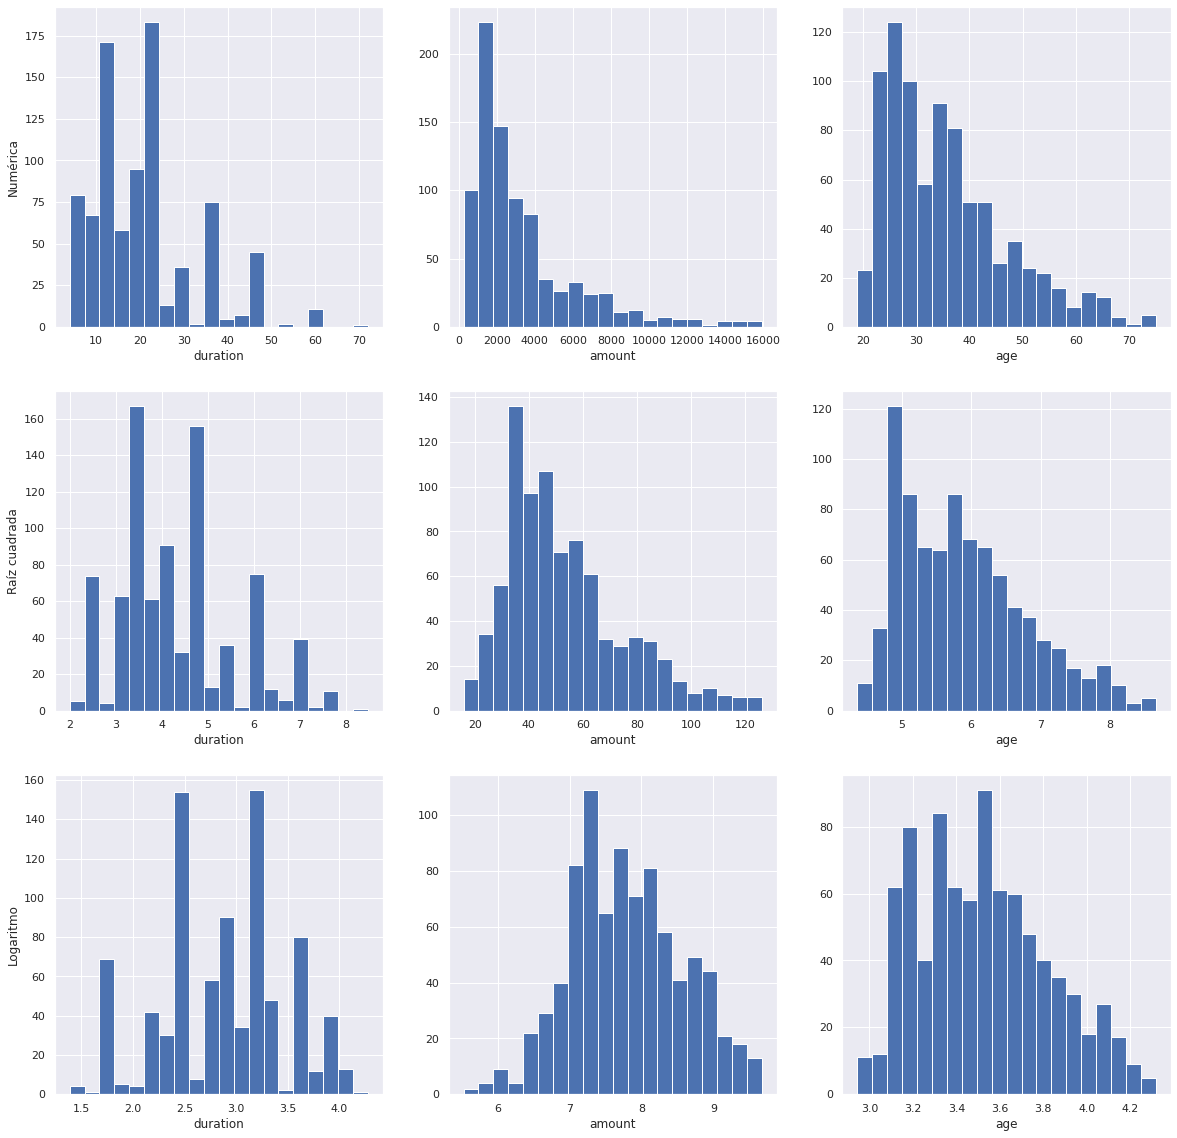

In [15]:
# Configurando el tamaño de las gráficas y su distribución
sns.set(rc={'figure.figsize':(20,20)}) 
fig, axes = plt.subplots(3, 3)   
#numerica
k=0
# Gráficas de las variables cuantitativas
for k in range(0,3):  
  plt.subplot(3, 3, k+1) 

  Transf0 = Xtrain[var_num].iloc[:,k].to_numpy().reshape(-1, 1)
  plt.hist(Transf0, bins=20) 
  plt.xlabel(var_num[k])
  if k==0:
    plt.ylabel("Numérica")
  
  plt.subplot(3, 3, k+4)    
  Transf1 = np.sqrt(Transf0)       
  plt.hist(Transf1, bins=20)       
  plt.xlabel(var_num[k])
  if k==0:
    plt.ylabel("Raíz cuadrada")

  plt.subplot(3, 3, k+7)    
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2, bins=20)      
  plt.xlabel(var_num[k])
  if k==0:
    plt.ylabel("Logaritmo")



In [16]:
# Escalando las variables cuantitativas a un rango equiparable
pipeline_num = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))),('log', FunctionTransformer(np.log))])
col_num = var_num

# Aplicando One-Hot
pipeline_cat = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown = 'ignore'))])
col_cat= var_cat

pipeline_Bin = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown = 'ignore'))])
col_bin = var_bin


col_trans = ColumnTransformer(transformers = [('numerical', pipeline_num, col_num),
                                                        ('categorical', pipeline_cat, col_cat),
                                                        ('binaries', pipeline_Bin, col_bin),
                                                        ], remainder='passthrough')

c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y 
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique  la 
transformación one-hot encoding. Por el momento dejar las variables ordinales sin 
transformar. 

#**Ejercicio-4.**

a.Usa los parámetros predeterminados de cada modelo.  

In [17]:
# Se establecen los modelos a procesar
def getModelos():
    modelos= list()
    nombres= list()

  # Regresión logística
    modelos.append( LogisticRegression(solver='liblinear') )
    nombres.append('RL')

  # Arbol de decisión
    modelos.append(DecisionTreeClassifier())
    nombres.append('AD')


  # Bosque aleatorio
    modelos.append(RandomForestClassifier())
    nombres.append('BA')

    return modelos, nombres

b.  En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, 
recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes 
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. 
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() 
de scikit-learn para definir las métricas). 

In [18]:
def mi_accuracy(yreal, ypred):
    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    return accuracy



def mi_precision(yreal, ypred):
    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    precision = tp/(tp+fp)
    return precision



def mi_recall(yreal, ypred):
    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    recall = tp/(tp+fn)
    return recall

def mi_f1score(yreal, ypred):
    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    f1score = (2*tp)/((2*tp)+fp+fn)
    return f1score

def mi_gmean(yreal, ypred):
    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    gmean = np.sqrt(recall * precision)
    return gmean


c.Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 

In [19]:
#Validacion cruzada estratificada con 5 particiones y 3 repeticiones, etablecidas en el ciclo for 
modelos, nombres = getModelos()
resultados = list()   
resultadosOU = list()
resultadoRecallTrain = list()

#Entrenamiento
for i in range(len(modelos)):
    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
    
    pipeline = Pipeline(steps=[('ct',col_trans),('m',modelos[i])])
    mismetricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
    }
    
    resultadosOU = cross_validate(pipeline, Xtrain, ytrain, scoring=mismetricas, cv=kfold, return_train_score=True)
    resultados.append(resultadosOU)
    
    print("Prueba \n") 
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']), np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_precision']),np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),np.std(resultadosOU['test_gmean'])
                                                                          ))
    print("Entrenamiento \n")
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultadosOU['train_accuracy']), np.std(resultadosOU['train_accuracy']),  
                                                                          np.mean(resultadosOU['train_precision']), np.std(resultadosOU['train_precision']), 
                                                                          np.mean(resultadosOU['train_recall']), np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_f1score']), np.std(resultadosOU['train_f1score']), 
                                                                          np.mean(resultadosOU['train_gmean']), np.std(resultadosOU['train_gmean']) ))
    
    resultadoRecallTrain.append(resultadosOU['test_recall'])


Prueba 

RL:
mean Accuracy: 0.761 (0.0266)
mean Precision: 0.798 (0.0217)
mean Recall: 0.884 (0.0324)
mean F1score: 0.838 (0.0188)
Gmean: 0.839 (0.0191)

Entrenamiento 

RL:
mean Accuracy: 0.795 (0.0071)
mean Precision: 0.818 (0.0076)
mean Recall: 0.910 (0.0068)
mean F1score: 0.862 (0.0045)
Gmean: 0.863 (0.0044)

Prueba 

AD:
mean Accuracy: 0.683 (0.0320)
mean Precision: 0.778 (0.0211)
mean Recall: 0.767 (0.0413)
mean F1score: 0.772 (0.0260)
Gmean: 0.772 (0.0260)

Entrenamiento 

AD:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Prueba 

BA:
mean Accuracy: 0.753 (0.0216)
mean Precision: 0.777 (0.0163)
mean Recall: 0.907 (0.0272)
mean F1score: 0.837 (0.0148)
Gmean: 0.839 (0.0152)

Entrenamiento 

BA:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)



In [20]:
# obteniendo valor de las metricas y resultados de prueba
import warnings 
resultadosCVTest = list()
warnings.filterwarnings("ignore") 

print( "Validación cruzada para datos de validación" )
resultadoRecallTest = list()
for i in range(len(modelos)):
    kflod2 = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=0 )  
    pipeline2 = Pipeline(steps=[('ct', col_trans), ('m',modelos[i])])
    resultadosCVTest = cross_validate(pipeline2, Xtest, ytest, scoring=mismetricas, cv= kflod2)

    print('%s:\nAccuracy: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nF1-Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                            np.mean(resultadosCVTest['test_accuracy']),
                                                                            np.std(resultadosCVTest['test_accuracy']), 
                                                                            np.mean(resultadosCVTest['test_precision']),
                                                                            np.std(resultadosCVTest['test_precision']),                                                                           
                                                                            np.mean(resultadosCVTest['test_recall']),
                                                                            np.std(resultadosCVTest['test_recall']),
                                                                            np.mean(resultadosCVTest['test_f1score']),
                                                                            np.std(resultadosCVTest['test_f1score']),                                                                           
                                                                            np.mean(resultadosCVTest['test_gmean']),
                                                                            np.std(resultadosCVTest['test_gmean']),  
                                                                            ))
    resultadoRecallTest.append(resultadosCVTest['test_recall'])            



resultadoRecallTest

Validación cruzada para datos de validación
RL:
Accuracy: 0.731 (0.0704)
Precision: 0.782 (0.0410)
Recall: 0.854 (0.0806)
F1-Score: 0.815 (0.0530)
Gmean: 0.817 (0.0536)

AD:
Accuracy: 0.644 (0.0512)
Precision: 0.755 (0.0442)
Recall: 0.737 (0.0918)
F1-Score: 0.741 (0.0489)
Gmean: 0.743 (0.0469)

BA:
Accuracy: 0.684 (0.0569)
Precision: 0.730 (0.0369)
Recall: 0.873 (0.0619)
F1-Score: 0.794 (0.0392)
Gmean: 0.798 (0.0400)



[array([0.9047619 , 0.9047619 , 0.80952381, 0.80952381, 0.80952381,
        0.9047619 , 0.80952381, 0.85714286, 0.80952381, 1.        ,
        0.9047619 , 0.66666667, 0.76190476, 0.9047619 , 0.95238095]),
 array([0.66666667, 0.80952381, 0.76190476, 0.80952381, 0.71428571,
        0.80952381, 0.85714286, 0.61904762, 0.71428571, 0.85714286,
        0.52380952, 0.76190476, 0.80952381, 0.66666667, 0.66666667]),
 array([0.85714286, 0.95238095, 0.85714286, 0.85714286, 0.85714286,
        0.9047619 , 0.85714286, 0.9047619 , 0.80952381, 0.95238095,
        0.9047619 , 0.71428571, 0.80952381, 0.9047619 , 0.95238095])]

d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como 
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la 
métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu 
respuesta. 

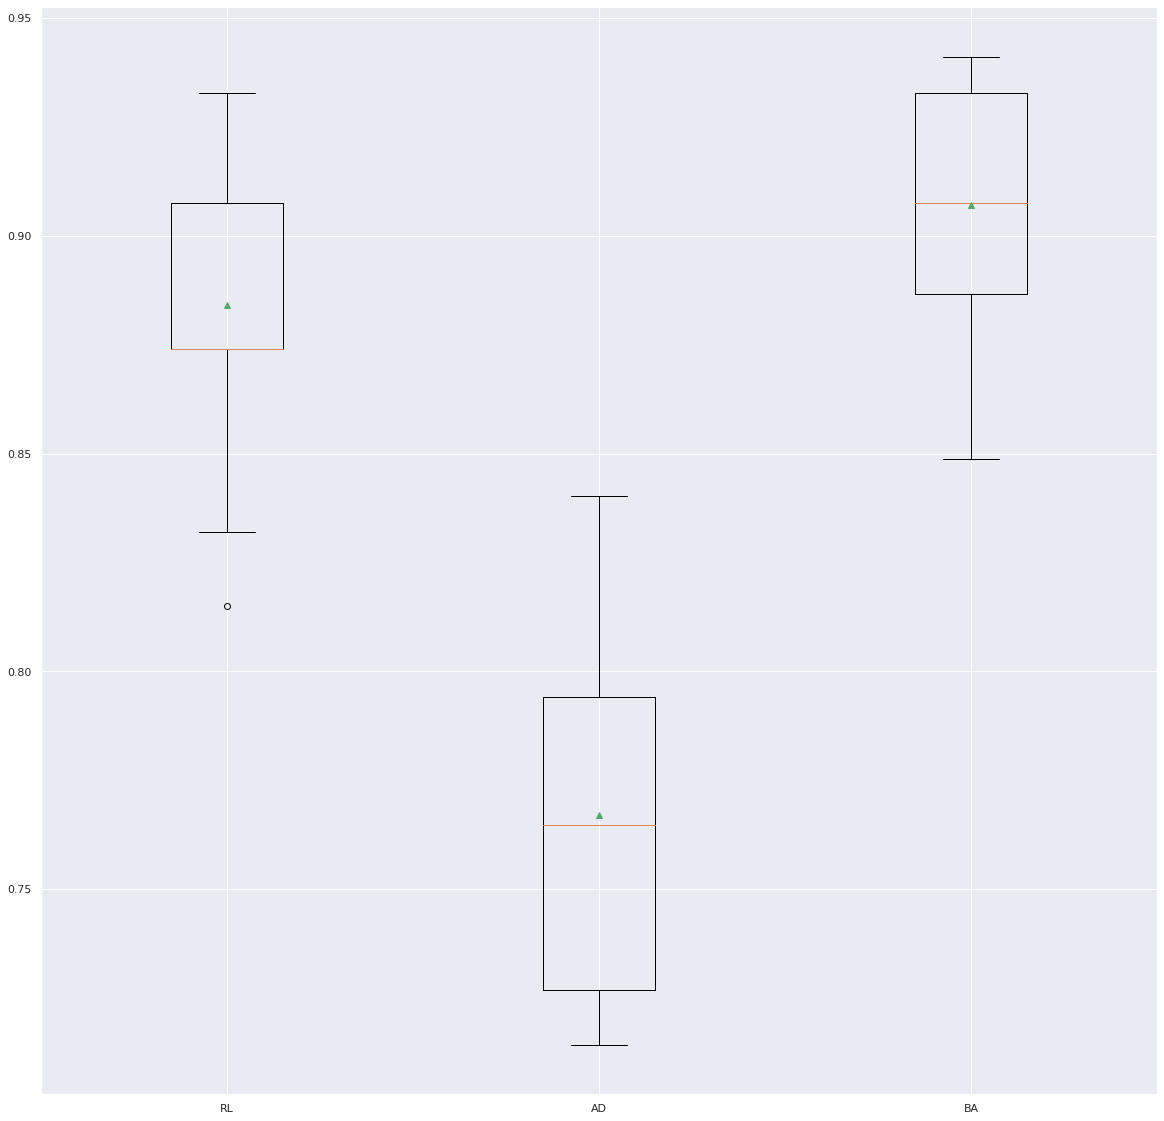

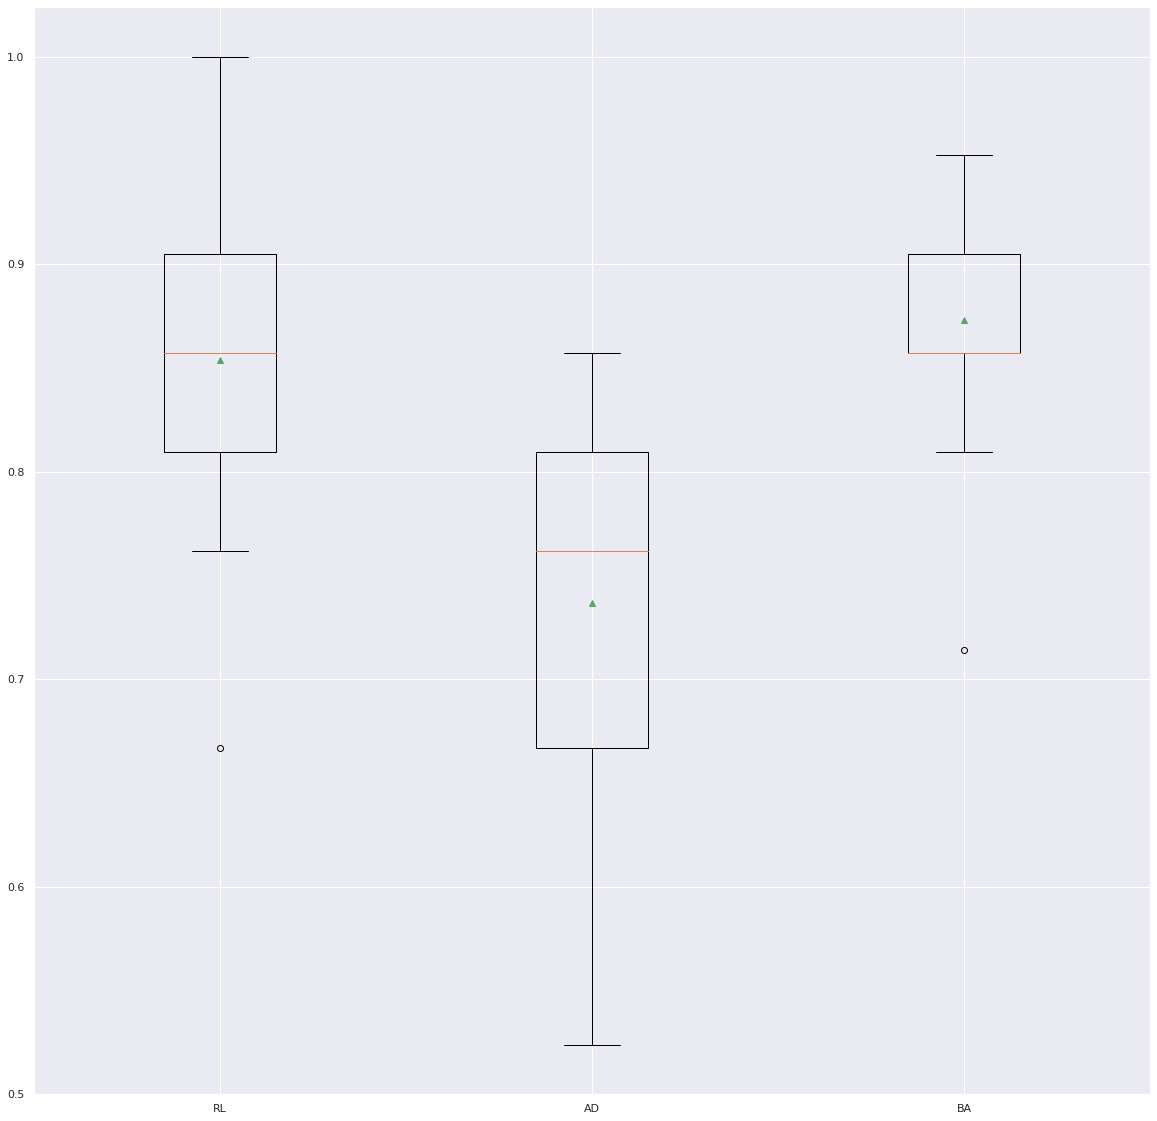

In [21]:
# Imprimiendo la métrica recall en diagrama de caja - Datos de entrenamiento
plt.boxplot(resultadoRecallTrain, labels=nombres, showmeans=True)
plt.show()

# Imprimiendo la métrica recall en diagrama de caja - Datos de validación
plt.boxplot(resultadoRecallTest, labels=nombres, showmeans=True)
plt.show()

e.i.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión Logística con su 
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de 
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”.  

In [22]:
#los diagramas de caja los copiamos del ejercicio 

#Esta es la funcion de ploteo que utilizarremos para cada vez que se requiera imprimir una curva de aprendizaje en cualquier parte dle ejercicio
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):
    train_mean = np.mean(train_scores, axis=1) 
    train_std = np.std(train_scores, axis=1) 
    val_mean = np.mean(val_scores, axis=1) 
    val_std = np.std(val_scores, axis=1) 
# Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar. 
    plt.figure(figsize=(7,6)) 
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training') 
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')  
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation') 
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')  
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra') 
    plt.xlabel('Tamaño del conjunto de entrenamiento') 
    plt.ylabel('Exactitud (accuracy)') 
    plt.grid() 
    plt.legend(loc='lower left') 
    plt.show()

def mi_ModeloYCurvas(Xin): 
#metodo de regresion Logistica
    modelo_rl = LogisticRegression(max_iter=2500, random_state=1) 
    mi_pipe = Pipeline(steps=[("PreparaInfo", col_trans),("LR", modelo_rl)])
    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
    delta_train_sz = np.linspace(0.1, 1.0, 40) 
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_f1score))

    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo lineal:


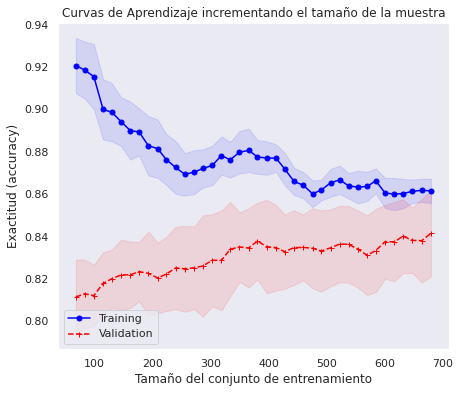

In [23]:
#Graficamos las curvas de aprendizaje
print('Curvas de aprendizaje del modelo lineal:')
mi_ModeloYCurvas(Xtrain)

##  Justificar la respuesta

ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo. 


In [24]:
def fn_validation_curve (x_val,y_val,param_name,cv,scoring):
    modelo = DecisionTreeClassifier()
    pipe = Pipeline(steps=[("Preparainfo",col_trans),("model",modelo)])
    rango_param = np.linspace(1, 20, 20,dtype="int")
    t_scores, v_scores = validation_curve(
      estimator=pipe,
      X=x_val,
      y=y_val,
      param_name=f"model__{param_name}",
      param_range=rango_param,
      cv=cv,
      scoring=scoring,
  )
    return rango_param, t_scores, v_scores

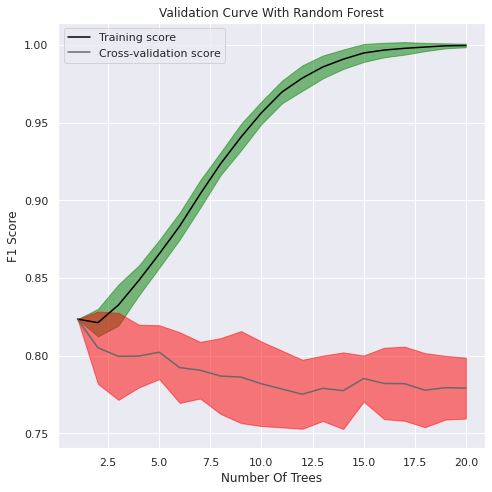

In [25]:
from scipy.stats import alpha
param_range,train_score, validation_score = fn_validation_curve(Xtrain,ytrain,"max_depth",kfold,make_scorer(mi_f1score))
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(validation_score, axis=1)
test_std = np.std(validation_score, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="green",alpha=0.5)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red",alpha=0.5)
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo. 

In [26]:
def mi_ModeloYCurvas_RF(Xin, Yin, param_name, cv_entrada, scoring):
    modelo_BA = RandomForestClassifier()
    mi_pipe = Pipeline(steps=[("PreparaInfo", col_trans),("model", modelo_BA)])       

    rango = np.linspace(1, 20, 20, dtype=int)
    t_scores, v_scores = validation_curve(estimator = mi_pipe, X=Xin, y=Yin, param_name=f"model__{param_name}", param_range=rango, cv=cv_entrada, scoring=scoring,)
    return rango, t_scores, v_scores

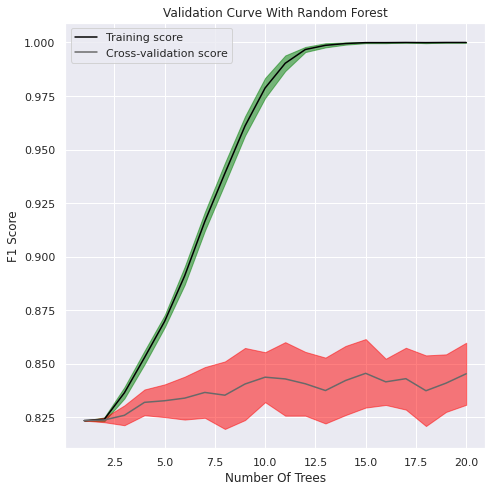

In [27]:
from scipy.stats import alpha
param_range,train_score, validation_score = mi_ModeloYCurvas_RF(Xtrain,ytrain,"max_depth",kfold,make_scorer(mi_f1score))
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(validation_score, axis=1)
test_std = np.std(validation_score, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="green",alpha=0.5)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red",alpha=0.5)
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [28]:
#Definiendo curvas de aprendizaje
def mi_curvaRF(Xin, Yin): 
#Aqui usamos la funcion para el random forest
    modeloBA = RandomForestClassifier() 
    mi_pipe = Pipeline(steps=[("PreparaInfo", col_trans),("ModeloUSadoRandomForest", modeloBA)])
    mi_kfold = RepeatedStratifiedKFol #definicion de 20 puntos enla partición, con 20 valores entre el .1 y el  1d(n_splits=5, n_repeats=3, random_state=7)  
    delta_train_sz = np.linspace(.1, 1, 20)
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = Yin,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_recall)) 

    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

mi_curvaRF(Xtrain, ytrain)

NameError: ignored

#**Ejercicio-5.** Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. 

a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.

NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son 
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación. 

In [29]:
modelo_g = LogisticRegression(max_iter=10000, random_state=1)
mi_pipe_g = Pipeline(steps=[("PreparaInfo", col_trans),("model", modelo_g)])       
mi_kfold_g = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
model_c = [0.01, 0.1, 1, 10, 100, 1000]

grid_param = [{'model__penalty': ['l1'], 'model__solver': [ 'saga'], 'model__class_weight':['balanced', None], 'model__C': model_c},
              {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': model_c},
              {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': model_c, 'model__l1_ratio': [0.5]},
              ]

gd = GridSearchCV(estimator=mi_pipe_g, param_grid=grid_param, scoring='f1', cv=mi_kfold_g)
gd.fit(Xtrain, np.ravel(ytrain))
best_score = gd.best_score_
best_param = gd.best_params_
print("Best Score:", best_score)
print("Best Parameter:", best_param)

Best Score: 0.8414999603331077
Best Parameter: {'model__C': 1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}


b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

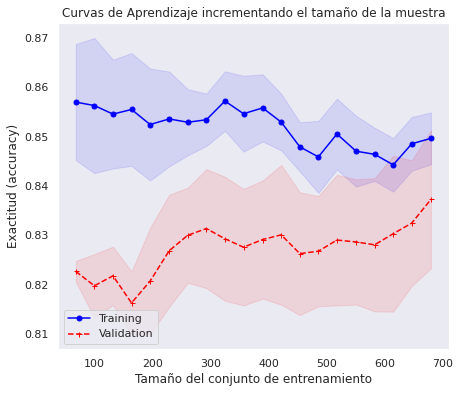

In [30]:
def fn_best_res (Xin, Yin, cs, penalizacion, resolutor):
    modelo_lc = LogisticRegression(C=cs, solver=resolutor, penalty=penalizacion, max_iter=10000, random_state=1)
    pipe_lc = Pipeline(steps=[("PreparaInfo", col_trans),("RegresionLogistica", modelo_lc)])
    kfold_lc = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
    train_size_lc = np.linspace(0.1, 1.0, 20)
    tr_sizes, tr_scores, val_scores = learning_curve(estimator=pipe_lc, X = Xin, y = Yin, cv = kfold_lc, train_sizes = train_size_lc, random_state=10, scoring=make_scorer(mi_f1score))
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

fn_best_res(Xtrain, ytrain, 0.1, 'l2', 'saga')

c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de 
la métrica “precision”? Incluye tus conclusiones. 

In [31]:
modelo_AD = DecisionTreeClassifier()
pipe_dt = Pipeline(steps=[("PreparaInfo", col_trans),("model", modelo_AD)])
kfold_dt = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

param_dt = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001], 
            'model__criterion': ['gini', 'entropy'], 
            'model__max_depth':[2, 4, 6, 8, 10, 12], 
            'model__min_samples_split':[2, 4, 6,8,10],
            'model__class_weight': ['balanced', None]}

decision_tree = GridSearchCV (estimator =  pipe_dt, 
                            param_grid = param_dt,
                            scoring = make_scorer(mi_precision),
                            cv = kfold_dt)
decision_tree.fit(Xtrain, np.ravel(ytrain))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('PreparaInfo',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('scalar',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2))),
                                                                                         ('log',
                                                                                          FunctionTransformer(func=<ufunc 'log'>))]),
                                                                         ['duration',
                                

d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.

f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

#**Ejercicio-6.** 
Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación: 


a. Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido.

In [ ]:
None

b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. 

c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas 
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

###**Fin de la Actividad de la semana 6.**